![Shark attacks, a project by Roberto Henríquez Perozo. Data Analytics Bootcamp at IronHack](shark-attacks.png)

<center>You can clone the repo of this project at <br>https://github.com/rihp/shark-attacks </center>

 <center><h1> PART II <br> Data analysis and hypothesis formulation</h1> </center>
 
 

In [1]:
# You should have an exported.csv file. 
# We generated it while following along the 'PART I' of this project. 
# Do you have it?
!ls
# If you don't, you can download the 'PART I' from: https://github.com/rihp/shark-attacks

analysis.ipynb	clean.ipynb   README.md
attacks.csv	exported.csv  shark-attacks.png


In [2]:
import pandas as pd
import random
import matplotlib

# Loading the cleaned dataset as a dataframe
df = pd.read_csv('exported.csv')
df

,Unnamed: 0,CaseNum,Date,Year,Type,Country,Area,Location,Activity,Sex,Injury,Fatal,Species,Source,href,Species2,Activity2,Provoked
0,0,2018.06.25,25-Jun-2018,2018.0,Boat,USA,California,"Oceanside, San Diego County",Paddling,F,"No injury to occupant, outrigger canoe and pad...",N,White shark,"R. Collier, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,White shark,Paddling,"No injury to occupant, outrigger canoe and pad..."
1,1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,Minor injury to left thigh,N,Invalid,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,INVALID ENTRY,Standing,Minor injury to left thigh
2,2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,Injury to left lower leg from surfboard skeg,N,Invalid,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,INVALID ENTRY,Surfing,Injury to left lower leg from surfboard skeg
3,3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,Minor injury to lower leg,N,2 m shark,"B. Myatt, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,OTHER / NOT KNOWN,Surfing,Minor injury to lower leg
4,4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m",A .Kipper,http://sharkattackfile.net/spreadsheets/pdf_di...,Tiger shark,Diving,PROVOKED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,M,FATAL,Y,Invalid,"H. Taunton; N. Bartlett, p. 234",http://sharkattackfile.net/spreadsheets/pdf_di...,INVALID ENTRY,Diving,FATAL
6298,6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,M,FATAL,Y,Invalid,"H. Taunton; N. Bartlett, pp. 233-234",http://sharkattackfile.net/spreadsheets/pdf_di...,INVALID ENTRY,Diving,FATAL
6299,6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,M,FATAL,Y,Invalid,"F. Schwartz, p.23; C. Creswell, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,INVALID ENTRY,Swimming,FATAL
6300,6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,M,FATAL,Y,Invalid,"The Sun, 10/20/1938",http://sharkattackfile.net/spreadsheets/pdf_di...,INVALID ENTRY,NOT SPECIFIED,FATAL


In [3]:
df.columns

Index(['Unnamed: 0', 'CaseNum', 'Date', 'Year', 'Type', 'Country', 'Area',
       'Location', 'Activity', 'Sex', 'Injury', 'Fatal', 'Species', 'Source',
       'href', 'Species2', 'Activity2', 'Provoked'],
      dtype='object')

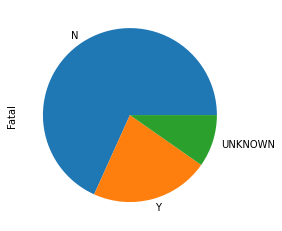

In [4]:
%matplotlib inline
# df1 = df.Species.value_counts()
s_fatal = df.Fatal.value_counts()

#
plot = s_fatal.plot.pie()

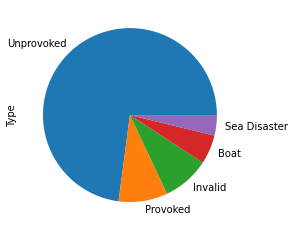

In [5]:
df.Type.value_counts().plot.pie()

In [6]:
# This plot is a mess, don't graph it
# df.Location.value_counts().plot.pie()

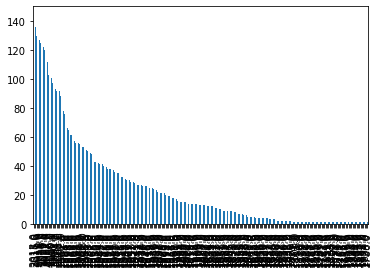

In [7]:
df.Year.value_counts().plot.bar()

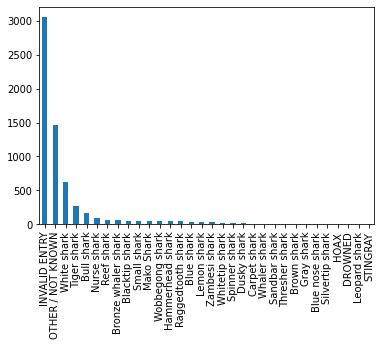

In [8]:
df.Species2.value_counts().plot.bar()

In [9]:
df[~df['Fatal'].isin(['UNKNOWN'])][['Species2', 'Fatal']]

,Species2,Fatal
0,White shark,N
1,INVALID ENTRY,N
2,INVALID ENTRY,N
3,OTHER / NOT KNOWN,N
4,Tiger shark,N
...,...,...
6297,INVALID ENTRY,Y
6298,INVALID ENTRY,Y
6299,INVALID ENTRY,Y
6300,INVALID ENTRY,Y


# I want to make a new column that specifies, the species and if it was deadly or not
Firts, I'll take any values which don't contribute to our research, and focus only on the deadliest species

In [10]:
fatals_filetred = ~df.Fatal.isin(['UNKNOWN'])

In [11]:
# Define the sharks I want to consider
killer_sharks =['White shark','Tiger shark', 'Bull shark', 'Nurse shark']

# How many samples of each species are there?
print(df.Species2[df.Species2.isin(killer_sharks)].value_counts())

# Create a dataframe containing only the indexes with those species
species_fatality = df[df.Species2.isin(killer_sharks)]
#df.Species2.value_counts()

White shark    625
Tiger shark    275
Bull shark     171
Nurse shark     94
Name: Species2, dtype: int64


In [12]:
species_fatality = df[df.Species2.isin(killer_sharks)]

In [13]:
species_fatality = species_fatality#.reset_index()
species_fatality[['Fatal', 'Species2']]
species_fatality[fatals_filetred]#.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,CaseNum,Date,Year,Type,Country,Area,Location,Activity,Sex,Injury,Fatal,Species,Source,href,Species2,Activity2,Provoked
0,0,2018.06.25,25-Jun-2018,2018.0,Boat,USA,California,"Oceanside, San Diego County",Paddling,F,"No injury to occupant, outrigger canoe and pad...",N,White shark,"R. Collier, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,White shark,Paddling,"No injury to occupant, outrigger canoe and pad..."
4,4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m",A .Kipper,http://sharkattackfile.net/spreadsheets/pdf_di...,Tiger shark,Diving,PROVOKED
6,6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,M,FATAL,Y,Tiger shark,"Diario de Pernambuco, 6/4/2018",http://sharkattackfile.net/spreadsheets/pdf_di...,Tiger shark,Swimming,FATAL
8,8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,M,Lower left leg bitten,N,"Bull shark, 6'","K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,Bull shark,Walking,Lower left leg bitten
14,14,2018.05.00,May 2018,2018.0,Provoked,AUSTRALIA,Westerm Australia,Dugong Bay,Feeding sharks,F,Shallow lacerations to finger PROVOKED INCIDENT,N,"Tawny nurse shark, 2m","Perth Now, 6/30/2018",http://sharkattackfile.net/spreadsheets/pdf_di...,Nurse shark,Feeding sharks,PROVOKED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6250,ND.0055,Before 1958,0.0,Provoked,BAHAMAS,Andros Islands,Middle Bight,Testing movie camera in full diving dress,M,Shark bit diver's sleeve after he patted it on...,N,"Nurse shark, 2.1 m [7']","V.M. Coppleson (1958), p.97",http://sharkattackfile.net/spreadsheets/pdf_di...,Nurse shark,Diving,PROVOKED
6253,6253,ND.0052,Before 1957,0.0,Unprovoked,NICARAGUA,Lake Nicaragua (fresh water),A village north of San Carlos,Lashing logs together when he fell into the water,M,"FATAL, leg severed",Y,"Bull shark caught, leg recovered & buried besi...","F. Poli, pp.150-153",http://sharkattackfile.net/spreadsheets/pdf_di...,Bull shark,Fell to the water,"FATAL, leg severed"
6265,6265,ND.0038,1941-1942,0.0,Unprovoked,IRAQ,Basrah,Shatt-el Arab River near a small boat stand,Swimming,M,"FATAL, left leg bitten with severe blood loss",Y,Bull shark,B.W. Coad & L.A.J. Al-Hassan,http://sharkattackfile.net/spreadsheets/pdf_di...,Bull shark,Swimming,"FATAL, left leg bitten with severe blood loss"
6274,6274,ND.0028,A few years before 1938,0.0,Boat,ITALY,Adriatic Sea,NaN,Wooden fishing boat,M,No injury to occupant; shark capsized boat,N,White shark,A. De Maddalena; Anon. (1938),http://sharkattackfile.net/spreadsheets/pdf_di...,White shark,Fishing,No injury to occupant; shark capsized boat


In [14]:
dfx = species_fatality[fatals_filetred]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [15]:
dfx

,Unnamed: 0,CaseNum,Date,Year,Type,Country,Area,Location,Activity,Sex,Injury,Fatal,Species,Source,href,Species2,Activity2,Provoked
0,0,2018.06.25,25-Jun-2018,2018.0,Boat,USA,California,"Oceanside, San Diego County",Paddling,F,"No injury to occupant, outrigger canoe and pad...",N,White shark,"R. Collier, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,White shark,Paddling,"No injury to occupant, outrigger canoe and pad..."
4,4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m",A .Kipper,http://sharkattackfile.net/spreadsheets/pdf_di...,Tiger shark,Diving,PROVOKED
6,6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,M,FATAL,Y,Tiger shark,"Diario de Pernambuco, 6/4/2018",http://sharkattackfile.net/spreadsheets/pdf_di...,Tiger shark,Swimming,FATAL
8,8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,M,Lower left leg bitten,N,"Bull shark, 6'","K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,Bull shark,Walking,Lower left leg bitten
14,14,2018.05.00,May 2018,2018.0,Provoked,AUSTRALIA,Westerm Australia,Dugong Bay,Feeding sharks,F,Shallow lacerations to finger PROVOKED INCIDENT,N,"Tawny nurse shark, 2m","Perth Now, 6/30/2018",http://sharkattackfile.net/spreadsheets/pdf_di...,Nurse shark,Feeding sharks,PROVOKED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6250,ND.0055,Before 1958,0.0,Provoked,BAHAMAS,Andros Islands,Middle Bight,Testing movie camera in full diving dress,M,Shark bit diver's sleeve after he patted it on...,N,"Nurse shark, 2.1 m [7']","V.M. Coppleson (1958), p.97",http://sharkattackfile.net/spreadsheets/pdf_di...,Nurse shark,Diving,PROVOKED
6253,6253,ND.0052,Before 1957,0.0,Unprovoked,NICARAGUA,Lake Nicaragua (fresh water),A village north of San Carlos,Lashing logs together when he fell into the water,M,"FATAL, leg severed",Y,"Bull shark caught, leg recovered & buried besi...","F. Poli, pp.150-153",http://sharkattackfile.net/spreadsheets/pdf_di...,Bull shark,Fell to the water,"FATAL, leg severed"
6265,6265,ND.0038,1941-1942,0.0,Unprovoked,IRAQ,Basrah,Shatt-el Arab River near a small boat stand,Swimming,M,"FATAL, left leg bitten with severe blood loss",Y,Bull shark,B.W. Coad & L.A.J. Al-Hassan,http://sharkattackfile.net/spreadsheets/pdf_di...,Bull shark,Swimming,"FATAL, left leg bitten with severe blood loss"
6274,6274,ND.0028,A few years before 1938,0.0,Boat,ITALY,Adriatic Sea,NaN,Wooden fishing boat,M,No injury to occupant; shark capsized boat,N,White shark,A. De Maddalena; Anon. (1938),http://sharkattackfile.net/spreadsheets/pdf_di...,White shark,Fishing,No injury to occupant; shark capsized boat


In [16]:
print(dfx.Fatal.value_counts())
print()
print(dfx.Species2.value_counts())

N    901
Y    247
Name: Fatal, dtype: int64

White shark    614
Tiger shark    271
Bull shark     170
Nurse shark     93
Name: Species2, dtype: int64


# 🦈️At this point, the data is clean enough to create the plot
## Grouping by Species, and then Fatality

In [17]:
import numpy as np

In [21]:
dfx['Victim_died'] = np.where(dfx.Fatal.isin(['Y']), True, False)
dfx['Victim_survived'] = np.where(dfx.Fatal.isin(['N']), True, False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
dfx.groupby(['Species2','Fatal']).agg({'Victim_survived':'sum', 'Victim_died':'sum'})

Victim_survived  Victim_died
Species2    Fatal                              
Bull shark  N                135.0          0.0
            Y                  0.0         35.0
Nurse shark N                 93.0          0.0
Tiger shark N                202.0          0.0
            Y                  0.0         69.0
White shark N                471.0          0.0
            Y                  0.0        143.0

In [20]:
dfx[['Species2','Fatal2']].groupby('Species2').agg({'Fatal':"count"})

KeyError: "['Fatal2'] not in index"

In [ ]:
sx = df.groupby(["Fatal", "Species2"]).agg({"Date":["min", "max"]})
sx

In [ ]:
sx = df.groupby(["Fatal", "Species2"]).agg({"Date":["min", "max"]})
sx

In [ ]:
def filt(x):
    if x =='UNKNOWN':
        return None
    else:
        return x
df.reset_index()
Fatal_na = df.Fatal.isin(['UNKNOWN'])
Species_na = df.Species2.isin(['INVALID ENTRY', 'OTHER / NOT KNOWN'])
sx = df.loc[~Fatal_na].groupby(["Fatal", "Species2"]).agg({"Type":"count"})
sy = df.loc[~Species_na]
# avoid.value_counts()
#Species_na.value_counts()
#df[~Fatal_na, ~Species_na]
sp_na = df[~Species_na]
df_nonull = sp_na[~Fatal_na]

In [ ]:
df_ok = df_nonull.reset_index()
# df_ok.head().plot.scatter(df_ok.Species2,df_ok.Fatal)

In [ ]:
matplotlib.pyplot.scatter(df_nonull.Fatal, df_nonull.Species2)


In [ ]:
dfx = df[['Species2','Fatal']]
dfx.isnull().sum()

In [ ]:
avoid1 = ~df['Fatal'].isin(['UNKNOWN'])
avoid2 = ~df['Species2'].isin(['OTHER / NOT KNOWN', 'INVALID ENTRY'])
df2p = df[avoid1][avoid2][['Species2', 'Fatal']]
#df2p.plot.bar('Fatal', 'Species2')

In [ ]:
df2p.Fatal.values

In [ ]:
df2p.Species2.values

In [ ]:
Yes = (lambda x: True if x == 'Y' else False)
df2p.groupby('Species2').agg({"Fatal" : Yes})

In [ ]:
df.columns